<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/Homework8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


In [16]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.decomposition import PCA

# For modeling
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# For Feature Importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import shap

# For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

In [15]:
#Load dataset
data = pd.read_csv(r"used_cars.csv")
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


Missing values per column:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


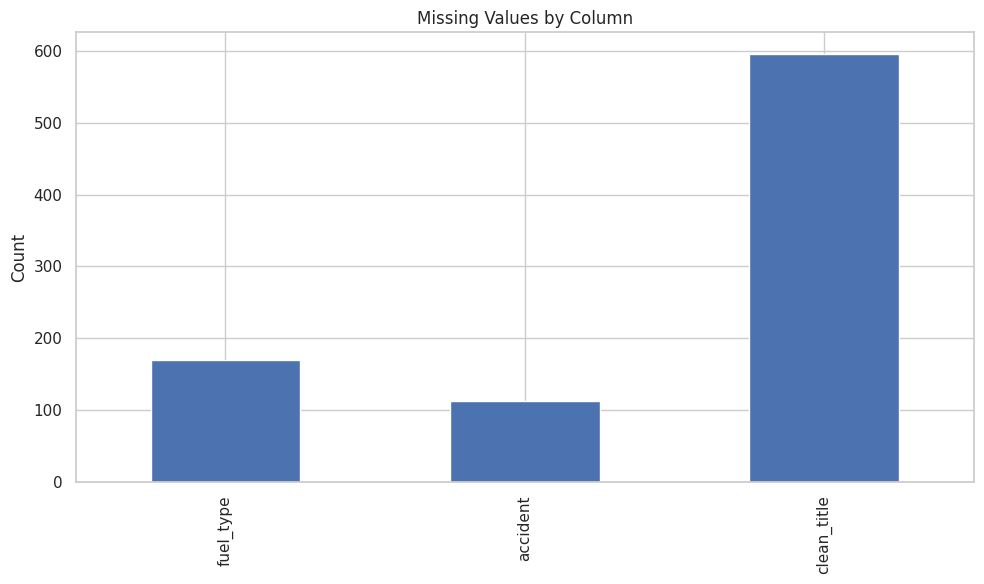

In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.tight_layout()

**Data Cleaning for missing values:**

In [66]:
# Create a copy of the dataset to work with
df = data.copy()

# Fill missing values with mode (common for categorical data)
imputer_mode = SimpleImputer(strategy='most_frequent')
df[['clean_title']] = imputer_mode.fit_transform(df[['clean_title']])
df[['fuel_type']] = imputer_mode.fit_transform(df[['fuel_type']])

#fill NaN with zero
df[['accident']] = df[['accident']].fillna(0)

#no more NaN values
df.isnull().sum()


,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


**Numeric feature rescaling or interaction:**

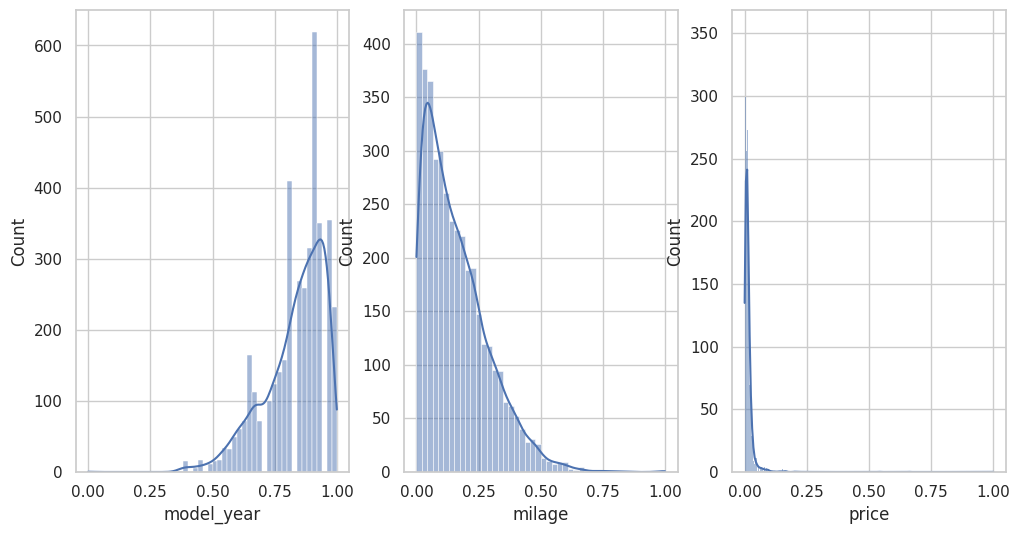

In [67]:
#Numeric features
# Extract numeric part from 'milage' and convert to float
df['milage'] = df['milage'].str.replace(',', '').str.extract('(\d+)').astype(float)
df['model_year'] = df['model_year']
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)  # Remove commas and dollar signs before converting

# 1. Scaling features
numeric_features = ['model_year', 'milage', 'price']
# Robust scaling (scale using quantiles, robust to outliers)
scaler_robust = RobustScaler()
df[numeric_features] = scaler_robust.fit_transform(df[numeric_features])

# Min-Max scaling (scale to range [0,1])
scaler_minmax = MinMaxScaler()
df[numeric_features] = scaler_minmax.fit_transform(df[numeric_features])

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)